# Task 1
Download the data using astropy from:http://data.astropy.org/tutorials/FITS-tables/chandra_events.fits  
I.Make a scatter plot using x and y column.  
II.Plot the energy distribution. 


In [1]:
#importing necessary packages
import numpy as np
from astropy.io import fits as f
from astropy.table import Table as t
import matplotlib.colors as mpl
import matplotlib.pyplot as plt
from astropy.utils.data import download_file

#downloading and opening the data file
fname=download_file('http://data.astropy.org/tutorials/FITS-tables/chandra_events.fits',cache=True)
fh=f.open(fname,memap=True)


In [2]:
#displaying the info in the file
fh.info()

Filename: C:\Users\sohin\.astropy\cache\download\py3\26e9900d731d08997d99ada3973f4592
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      30   ()      
  1  EVENTS        1 BinTableHDU    890   483964R x 19C   [1D, 1I, 1I, 1J, 1I, 1I, 1I, 1I, 1E, 1E, 1E, 1E, 1J, 1J, 1E, 1J, 1I, 1I, 32X]   
  2  GTI           3 BinTableHDU     28   1R x 2C   [1D, 1D]   
  3  GTI           2 BinTableHDU     28   1R x 2C   [1D, 1D]   
  4  GTI           1 BinTableHDU     28   1R x 2C   [1D, 1D]   
  5  GTI           0 BinTableHDU     28   1R x 2C   [1D, 1D]   
  6  GTI           6 BinTableHDU     28   1R x 2C   [1D, 1D]   


In [3]:
#Checking what columns are present in the table to locate useful data sets
print(fh[1].columns)

ColDefs(
    name = 'time'; format = '1D'; unit = 's'
    name = 'ccd_id'; format = '1I'
    name = 'node_id'; format = '1I'
    name = 'expno'; format = '1J'
    name = 'chipx'; format = '1I'; unit = 'pixel'; coord_type = 'CPCX'; coord_unit = 'mm'; coord_ref_point = 0.5; coord_ref_value = 0.0; coord_inc = 0.023987
    name = 'chipy'; format = '1I'; unit = 'pixel'; coord_type = 'CPCY'; coord_unit = 'mm'; coord_ref_point = 0.5; coord_ref_value = 0.0; coord_inc = 0.023987
    name = 'tdetx'; format = '1I'; unit = 'pixel'
    name = 'tdety'; format = '1I'; unit = 'pixel'
    name = 'detx'; format = '1E'; unit = 'pixel'; coord_type = 'LONG-TAN'; coord_unit = 'deg'; coord_ref_point = 4096.5; coord_ref_value = 0.0; coord_inc = 0.00013666666666667
    name = 'dety'; format = '1E'; unit = 'pixel'; coord_type = 'NPOL-TAN'; coord_unit = 'deg'; coord_ref_point = 4096.5; coord_ref_value = 0.0; coord_inc = 0.00013666666666667
    name = 'x'; format = '1E'; unit = 'pixel'; coord_type = 'RA---TAN'; c

In [4]:
#storing the data in a separate variable
ed=fh[1].data

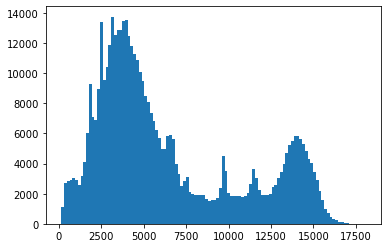

In [5]:
#plotting a histogram of the energy values
e=plt.hist(ed['energy'],bins='auto')

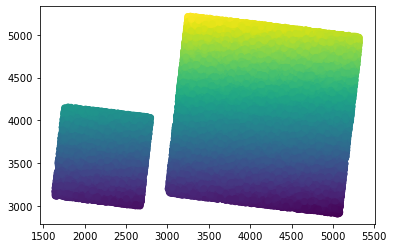

In [20]:
#plotting a scatter plot using x and y columns
plt.scatter(ed['x'],ed['y'],c=ed['y'],cmap='viridis')

## Additional Analysis

To explore the Astropy package and the given data further, I have performed the following tasks. These are not a part of the assigned homework.

Text(0, 0.5, 'y')

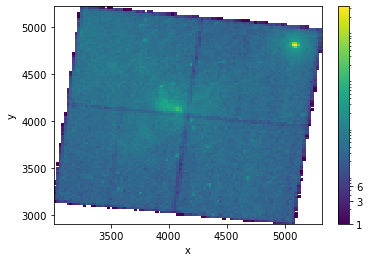

In [16]:
#Plotting a colorbar map of the data
NBINS = (100,100)
img_zero_mpl = plt.hist2d(ed['x'][ii], ed['y'][ii], NBINS,
                          cmap='viridis', norm=mpl.LogNorm())

cbar = plt.colorbar(ticks=[1.0,3.0,6.0])
cbar.ax.set_yticklabels(['1','3','6'])

plt.xlabel('x')
plt.ylabel('y')

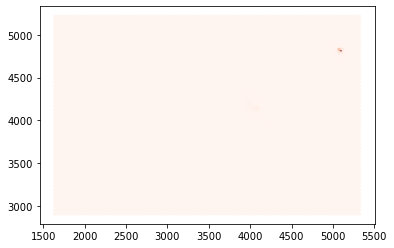

In [19]:
#Plotting a hexbin map
plt.hexbin(ed['x'],ed['y'],cmap='Reds')

In [23]:
#Closing the fits file
fh.close()